In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(3)
tf.random.set_seed(3)

In [2]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = 'suicide_data.csv'

Saving suicide_data.csv to suicide_data.csv


In [3]:
df = pd.read_csv(my_data)

df

,ID,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,L_OUT_FQ,mh_suicide,BE8_1,LW_mt,LW_oc,HE_HP,HE_anem,O_chew_d,L_BR_FQ,L_LN_FQ,L_DN_FQ,DI2_pr,DI3_pr,DI4_pr,DI5_pr,DI6_pr,DM1_pr,DM2_pr,DM3_pr,DM4_pr,D_8_2,D_8_4,DJ4_pr,DE1_pr,DE2_pr,DC1_pr,DC2_pr,DC3_pr,DC4_pr,...,DK8_pr,DK9_pr,DK4_pr,LQ4_00,LQ1_sb,LQ_1EQL,LQ_2EQL,LQ_3EQL,LQ_4EQL,LQ_5EQL,educ,EC1_1,BO1,BO1_1,BO2_1,BD1_11,incm,edu,occp,marri_1,HE_wt,HE_wc,HE_BMI,N_EN,N_WATER,N_PROT,N_FAT,N_SFA,N_MUFA,N_PUFA,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,A739211515,1,2,3,20,2,3,1,10,1,0,5,0,5,8,2,2,0,0,4,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,2,2,1,1,1,1,1,6,2,3,1,2,4,4,4,7,1,52.000,70.6,19.765,1837.930,897.163,67.870,72.259,22.994,21.542,18.758,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2,3
1,A739211516,1,1,3,20,2,3,1,10,1,1,4,0,6,,,1,0,0,4,1,1,8,8,8,8,8,1,1,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,2,2,3,1,1,1,1,6,1,4,2,1,4,4,3,1,1,90.800,87.3,24.631,2097.833,848.973,66.078,79.148,14.956,20.345,31.701,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2,3
2,A739211517,1,2,3,20,2,3,3,20,1,,1,,,,,,,,1,1,1,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,4,3,,1,,NaN,,1695.707,897.464,63.313,31.191,6.449,6.946,10.176,136.681,272.175,19.292,266.870,13.276,2265.539,2073.714,105.935,2,3
3,A739219614,1,1,4,20,1,3,1,20,1,0,2,0,6,,,2,0,0,1,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,2,2,1,1,1,1,1,6,1,4,1,1,4,2,4,1,1,79.400,93.2,26.075,1362.385,653.982,42.800,24.044,6.026,6.451,6.338,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2,3
4,A739219615,1,2,4,20,1,3,1,20,1,0,3,0,10,1,2,1,0,0,2,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,2,2,1,1,1,1,1,8,1,4,3,1,2,3,4,1,1,67.400,92.9,25.306,1472.317,1359.221,35.380,22.863,7.855,5.484,3.029,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,P702300217,2,1,4,10,1,2,88,30,2,0,3,0,13,,,,0,,1,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,2,2,8,8,8,8,8,4,8,3,8,2,8,1,1,,2,60.000,72.0,20.495,4203.391,1147.538,142.350,84.490,28.607,24.283,19.044,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3,1
7376,P702312314,2,2,2,20,1,2,3,10,2,0,4,0,5,1,1,1,0,0,3,1,1,8,8,8,8,8,8,8,8,8,2,2,8,8,8,8,8,8,8,...,8,8,8,2,2,1,1,1,1,1,4,1,3,1,2,1,3,2,3,1,53.500,65.0,22.384,1925.452,1780.393,96.515,44.656,8.673,12.778,18.764,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1,3
7377,P702322414,2,1,1,20,1,2,3,10,2,0,7,0,12,,,1,0,0,2,1,1,8,8,8,8,8,8,8,8,8,2,2,1,8,8,8,8,8,8,...,8,8,8,2,2,2,2,2,2,1,5,2,3,1,2,1,2,3,7,1,67.100,87.2,24.002,2830.103,482.872,90.338,50.916,14.943,17.084,14.580,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2,3
7378,P702330414,2,1,1,10,1,2,2,30,2,1,3,0,5,,,3,0,1,2,1,1,1,1,8,8,8,8,8,8,8,1,2,8,1,8,8,8,8,8,...,8,8,8,2,2,2,1,2,2,1,2,1,4,2,2,1,1,1,5,1,62.600,88.1,25.300,1628.280,237.165,37.928,12.249,4.518,1.938,1.462,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2,1


## Feature 종류
#### 2015년 국민건강영양조사 기본 DB 중 89개의 특성과 7,380개의 데이터로
#### 자살 고위험군 선별 시스템을 설계합니다.

#### 각 속성의 데이터타입(dtype)은 object, int, float의 유형이 섞여 있습니다.
#### (특정 속성의 dtype이 'object'인 경우, 결측값이 NAN이 아닌 공백으로 처리되어 있어 이를 변환한 후, 결측값 처리를 진행해야 합니다.)

#### 각 속성에 대한 값 중 결측이 있는 경우도 있으며, '모름', 무응답으로 표기된 데이터가 존재합니다.
#### 모름, 무응답으로 표기된 데이터는 8 또는 9(속성에 따라 88 또는 99)로 나와 있어 해당 데이터 또한 결측으로 표기해야 합니다.
#### 해당 속성은 범수형 속성 중 cfam, BD1_11, BE8_1 입니다.


### numeric_feature
['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']

### categorical_feature
['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'LW_mt', 'LW_oc', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

### y_label
['mh_suicide']

### 각 속성에 대한 의미는 제일 하단의 이미지 참고

## 데이터 살펴보기 (결측률)

In [4]:
# 모름 또는 무응답으로 표기된 데이터를 결측값으로 대체합니다.

df = df.replace({'cfam':8, 'cfam':np.nan})
df = df.replace({'cfam':9, 'cfam':np.nan})
df = df.replace({'BD1_11':8, 'BD1_11':np.nan})
df = df.replace({'BD1_11':9, 'BD1_11':np.nan})
df = df.replace({'BE8_1':88, 'BE8_1':np.nan})
df = df.replace({'BE8_1':88, 'BE8_1':np.nan})

In [5]:
# 데이터 유형이 다른 속성들을 전부 numeric 속성으로 변환하여 결측을 찾습니다.

Counter(df.dtypes)

Counter({dtype('int64'): 10, dtype('float64'): 16, dtype('O'): 63})

In [6]:
df = df.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

In [ ]:
# 변환 후 확인

#Counter(df.dtypes)

In [ ]:
#df.isnull().sum()

In [8]:
# null 값이 있는 feature와 결측의 개수 출력하는 함수 

def null_check(df):
    null = df.isnull().sum()
    
    null_col=[]

    for i in range(len(df.columns)):
        if (null[i]!=0):
            print(null.index[i],null[i])
            null_col.append(null.index[i])

In [9]:
null_check(df)

mh_stress 1445
L_OUT_FQ 750
mh_suicide 1445
BE8_1 476
LW_mt 3608
LW_oc 3608
HE_HP 2176
HE_anem 1555
O_chew_d 1976
L_BR_FQ 750
L_LN_FQ 750
L_DN_FQ 750
DI2_pr 476
DI3_pr 476
DI4_pr 921
DI5_pr 476
DI6_pr 476
DM1_pr 924
DM2_pr 476
DM3_pr 476
DM4_pr 476
D_8_2 476
D_8_4 476
DJ4_pr 476
DE1_pr 476
DE2_pr 476
DC1_pr 476
DC2_pr 476
DC3_pr 476
DC4_pr 476
DC5_pr 476
DC6_pr 476
DC7_pr 476
DF2_pr 476
DL1_pr 476
DJ8_pr 476
DH2_pr 476
DH3_pr 476
DN1_pr 476
DK8_pr 476
DK9_pr 476
DK4_pr 476
LQ4_00 476
LQ1_sb 476
LQ_1EQL 476
LQ_2EQL 476
LQ_3EQL 476
LQ_4EQL 476
LQ_5EQL 476
educ 476
EC1_1 476
BO1 476
BO1_1 476
BO2_1 476
BD1_11 476
incm 52
edu 968
occp 2025
HE_wt 409
HE_wc 413
HE_BMI 421
N_EN 752
N_WATER 752
N_PROT 752
N_FAT 752
N_SFA 752
N_MUFA 752
N_PUFA 752
N_CHOL 752
N_CHO 752
N_TDF 752
N_CA 752
N_FE 752
N_NA 752
N_K 752
N_VITC 752
LF_SAFE 427
LF_S2 427


#### y_label에 해당하는 'mh_scicide' 변수 결측의 경우, 임의로 채울 수 없는 부분이므로 결측을 포함하는 행을 삭제합니다.

In [10]:
df1 = df.dropna(subset=['mh_suicide'])

In [11]:
df1

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,L_OUT_FQ,mh_suicide,BE8_1,LW_mt,LW_oc,HE_HP,HE_anem,O_chew_d,L_BR_FQ,L_LN_FQ,L_DN_FQ,DI2_pr,DI3_pr,DI4_pr,DI5_pr,DI6_pr,DM1_pr,DM2_pr,DM3_pr,DM4_pr,D_8_2,D_8_4,DJ4_pr,DE1_pr,DE2_pr,DC1_pr,DC2_pr,DC3_pr,DC4_pr,DC5_pr,...,DK8_pr,DK9_pr,DK4_pr,LQ4_00,LQ1_sb,LQ_1EQL,LQ_2EQL,LQ_3EQL,LQ_4EQL,LQ_5EQL,educ,EC1_1,BO1,BO1_1,BO2_1,BD1_11,incm,edu,occp,marri_1,HE_wt,HE_wc,HE_BMI,N_EN,N_WATER,N_PROT,N_FAT,N_SFA,N_MUFA,N_PUFA,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,1,2,3,20,2,3,1,10,1,0.0,5.0,0.0,5.0,8.0,2.0,2.0,0.0,0.0,4.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,3.0,1.0,2.0,4.0,4.0,4.0,7.0,1,52.0,70.6,19.765,1837.930,897.163,67.870,72.259,22.994,21.542,18.758,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2.0,3.0
1,1,1,3,20,2,3,1,10,1,1.0,4.0,0.0,6.0,NaN,NaN,1.0,0.0,0.0,4.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,6.0,1.0,4.0,2.0,1.0,4.0,4.0,3.0,1.0,1,90.8,87.3,24.631,2097.833,848.973,66.078,79.148,14.956,20.345,31.701,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2.0,3.0
3,1,1,4,20,1,3,1,20,1,0.0,2.0,0.0,6.0,NaN,NaN,2.0,0.0,0.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,1.0,4.0,2.0,4.0,1.0,1,79.4,93.2,26.075,1362.385,653.982,42.800,24.044,6.026,6.451,6.338,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2.0,3.0
4,1,2,4,20,1,3,1,20,1,0.0,3.0,0.0,10.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,4.0,3.0,1.0,2.0,3.0,4.0,1.0,1,67.4,92.9,25.306,1472.317,1359.221,35.380,22.863,7.855,5.484,3.029,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2.0,3.0
7,1,2,1,20,3,3,3,10,1,1.0,6.0,0.0,4.0,1.0,2.0,2.0,NaN,0.0,1.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,5.0,3.0,1.0,2.0,1.0,1.0,3.0,1,63.6,89.6,29.036,1746.097,684.160,57.849,72.943,25.722,27.030,12.159,72.310,210.397,15.754,264.357,5.499,3105.538,2331.930,224.503,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2,1,4,10,1,2,88,30,2,0.0,3.0,0.0,13.0,NaN,NaN,NaN,0.0,NaN,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,4.0,8.0,3.0,8.0,2.0,8.0,1.0,1.0,NaN,2,60.0,72.0,20.495,4203.391,1147.538,142.350,84.490,28.607,24.283,19.044,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3.0,1.0
7376,2,2,2,20,1,2,3,10,2,0.0,4.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,3.0,1,53.5,65.0,22.384,1925.452,1780.393,96.515,44.656,8.673,12.778,18.764,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1.0,3.0
7377,2,1,1,20,1,2,3,10,2,0.0,7.0,0.0,12.0,NaN,NaN,1.0,0.0,0.0,2.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,2.0,3.0,1.0,2.0,1.0,2.0,3.0,7.0,1,67.1,87.2,24.002,2830.103,482.872,90.338,50.916,14.943,17.084,14.580,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2.0,3.0
7378,2,1,1,10,1,2,2,30,2,1.0,3.0,0.0,5.0,NaN,NaN,3.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,2.0,8.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,2.0,1.0

In [12]:
# 다시 결측 확인 
null_check(df1)

mh_stress 1
L_OUT_FQ 643
LW_mt 2640
LW_oc 2640
HE_HP 845
HE_anem 411
O_chew_d 531
L_BR_FQ 643
L_LN_FQ 643
L_DN_FQ 643
DI4_pr 365
DM1_pr 365
incm 36
edu 398
occp 652
HE_wt 5
HE_wc 7
HE_BMI 9
N_EN 645
N_WATER 645
N_PROT 645
N_FAT 645
N_SFA 645
N_MUFA 645
N_PUFA 645
N_CHOL 645
N_CHO 645
N_TDF 645
N_CA 645
N_FE 645
N_NA 645
N_K 645
N_VITC 645
LF_SAFE 354
LF_S2 354


#### 결측률이 10%를 훨씬 뛰어넘는 변수 LW_mt, LW_oc 삭제 

In [21]:
df2 = df1.drop(['LW_mt','LW_oc'],axis='columns',inplace=False)

In [22]:
df2

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,L_OUT_FQ,mh_suicide,BE8_1,HE_HP,HE_anem,O_chew_d,L_BR_FQ,L_LN_FQ,L_DN_FQ,DI2_pr,DI3_pr,DI4_pr,DI5_pr,DI6_pr,DM1_pr,DM2_pr,DM3_pr,DM4_pr,D_8_2,D_8_4,DJ4_pr,DE1_pr,DE2_pr,DC1_pr,DC2_pr,DC3_pr,DC4_pr,DC5_pr,DC6_pr,DC7_pr,...,DK8_pr,DK9_pr,DK4_pr,LQ4_00,LQ1_sb,LQ_1EQL,LQ_2EQL,LQ_3EQL,LQ_4EQL,LQ_5EQL,educ,EC1_1,BO1,BO1_1,BO2_1,BD1_11,incm,edu,occp,marri_1,HE_wt,HE_wc,HE_BMI,N_EN,N_WATER,N_PROT,N_FAT,N_SFA,N_MUFA,N_PUFA,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,1,2,3,20,2,3,1,10,1,0.0,5.0,0.0,5.0,2.0,0.0,0.0,4.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,3.0,1.0,2.0,4.0,4.0,4.0,7.0,1,52.0,70.6,19.765,1837.930,897.163,67.870,72.259,22.994,21.542,18.758,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2.0,3.0
1,1,1,3,20,2,3,1,10,1,1.0,4.0,0.0,6.0,1.0,0.0,0.0,4.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,6.0,1.0,4.0,2.0,1.0,4.0,4.0,3.0,1.0,1,90.8,87.3,24.631,2097.833,848.973,66.078,79.148,14.956,20.345,31.701,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2.0,3.0
3,1,1,4,20,1,3,1,20,1,0.0,2.0,0.0,6.0,2.0,0.0,0.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,1.0,4.0,2.0,4.0,1.0,1,79.4,93.2,26.075,1362.385,653.982,42.800,24.044,6.026,6.451,6.338,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2.0,3.0
4,1,2,4,20,1,3,1,20,1,0.0,3.0,0.0,10.0,1.0,0.0,0.0,2.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,4.0,3.0,1.0,2.0,3.0,4.0,1.0,1,67.4,92.9,25.306,1472.317,1359.221,35.380,22.863,7.855,5.484,3.029,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2.0,3.0
7,1,2,1,20,3,3,3,10,1,1.0,6.0,0.0,4.0,2.0,NaN,0.0,1.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,5.0,3.0,1.0,2.0,1.0,1.0,3.0,1,63.6,89.6,29.036,1746.097,684.160,57.849,72.943,25.722,27.030,12.159,72.310,210.397,15.754,264.357,5.499,3105.538,2331.930,224.503,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2,1,4,10,1,2,88,30,2,0.0,3.0,0.0,13.0,NaN,0.0,NaN,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,4.0,8.0,3.0,8.0,2.0,8.0,1.0,1.0,NaN,2,60.0,72.0,20.495,4203.391,1147.538,142.350,84.490,28.607,24.283,19.044,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3.0,1.0
7376,2,2,2,20,1,2,3,10,2,0.0,4.0,0.0,5.0,1.0,0.0,0.0,3.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,3.0,1,53.5,65.0,22.384,1925.452,1780.393,96.515,44.656,8.673,12.778,18.764,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1.0,3.0
7377,2,1,1,20,1,2,3,10,2,0.0,7.0,0.0,12.0,1.0,0.0,0.0,2.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2.0,2.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,2.0,3.0,1.0,2.0,1.0,2.0,3.0,7.0,1,67.1,87.2,24.002,2830.103,482.872,90.338,50.916,14.943,17.084,14.580,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2.0,3.0
7378,2,1,1,10,1,2,2,30,2,1.0,3.0,0.0,5.0,3.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,2.0,8.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,2.0,2.0,2.0,1

In [23]:
df2.describe()

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,L_OUT_FQ,mh_suicide,BE8_1,HE_HP,HE_anem,O_chew_d,L_BR_FQ,L_LN_FQ,L_DN_FQ,DI2_pr,DI3_pr,DI4_pr,DI5_pr,DI6_pr,DM1_pr,DM2_pr,DM3_pr,DM4_pr,D_8_2,D_8_4,DJ4_pr,DE1_pr,DE2_pr,DC1_pr,DC2_pr,DC3_pr,DC4_pr,DC5_pr,DC6_pr,DC7_pr,...,DK8_pr,DK9_pr,DK4_pr,LQ4_00,LQ1_sb,LQ_1EQL,LQ_2EQL,LQ_3EQL,LQ_4EQL,LQ_5EQL,educ,EC1_1,BO1,BO1_1,BO2_1,BD1_11,incm,edu,occp,marri_1,HE_wt,HE_wc,HE_BMI,N_EN,N_WATER,N_PROT,N_FAT,N_SFA,N_MUFA,N_PUFA,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5934.000000,5292.000000,5935.000000,5935.000000,5090.000000,5524.000000,5404.000000,5292.000000,5292.000000,5292.000000,5935.000000,5935.000000,5570.000000,5935.000000,5935.000000,5570.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,...,5935.00000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5899.000000,5537.000000,5283.000000,5935.000000,5930.000000,5928.000000,5926.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5581.000000,5581.000000
mean,1.507161,1.555181,3.057793,19.222578,1.829486,1.844819,21.952485,18.731424,1.303454,0.271149,4.123016,0.054591,15.526032,1.880354,0.080196,0.244078,1.629630,1.139834,1.125661,7.018197,7.906150,7.801077,8.000674,7.922494,7.057271,7.255771,7.946251,7.506150,5.140691,5.085425,7.861668,7.491154,7.817523,7.987869,8.055602,8.025442,8.014153,8.026790,8.051390,7.991238,...,7.96428,8.049537,8.037405,2.374052,2.377422,2.269587,2.177422,2.217692,2.367481,2.238585,11.412974,2.201348,3.288627,2.200842,2.332940,4.063016,2.515511,2.634278,4.901571,1.237237,63.092648,82.412433,23.760172,2031.728126,1124.924466,72.197095,45.351109,12.812845,13.904405,11.103458,251.426087,313.905312,24.444346,491.780140,17.272302,3845.975069,3032.421206,105.044051,1.571045,2.935316
std,0.499991,0.496988,1.251300,3.451161,0.655978,0.845504,36.845830,11.693536,0.815100,0.444590,1.820260,0.227200,25.248998,0.871836,0.271620,0.429579,1.052584,0.503348,0.425833,2.556936,1.079165,1.177358,0.701964,1.027458,2.406922,2.281789,0.943987,1.946605,3.105588,3.170731,1.233276,1.931210,1.356020,0.792526,0.315761,0.581010,0.649961,0.579788,0.367478,0.766191,...,0.89001,0.391913,0.482539,1.758105,1.756426,2.647555,2.671681,2.661461,2.623477,2.656563,23.565007,2.272785,0.944409,2.001120,1.301273,2.318230,1.112929,1.157285,2.272801,0.425424,12.402359,10.359963,3.593823,970.835293,704.767994,51.675381,37.963953,11.709415,13.143161,11.111458,282.460174,133.375861,14.003415,314.219462,11.920659,3404.168789,1684.164395,120.842697,0.627489,0.276839
min,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.500000,53.600000,12.904000,74.298000,7.864000,2.818000,0.738000,0.006000,0.005000,0.031000,0.137000,7.173000,0.210000,5.401000,0.008000,2.868000,16.499000,-0.121000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,20.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,3.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8

In [24]:
Counter(df2['mh_suicide'])

Counter({0.0: 5611, 1.0: 324})

## 데이터 전처리

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [26]:
def pipeline(df, nums, cats):
    
    num_inputer = SimpleImputer(strategy='median')
    num_pipeline=Pipeline([
        ("select_numeric",DataFrameSelector(nums)),
        ("impute", num_inputer),
        ("scaler", StandardScaler())])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_pipeline = Pipeline([
        ("select_cat",DataFrameSelector(cats)),
        ("impute", cat_imputer)])
        #("encoder", OneHotEncoder())])
    
    preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])
    
    X=preprocess_pipeline.fit_transform(df)
    
    return X

In [27]:
nums = ['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']
cats = ['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

In [28]:
X_data = pipeline(df2,nums,cats)

# 범주형 속성을 원-핫 인코딩을 실행하면서 희소행렬 형태로 output이 출력됩니다.

In [ ]:
#print(X_data[0])

In [29]:
y_label = df2['mh_suicide']

#### 데이터 나누기

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.3, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [32]:
from imblearn.over_sampling import SMOTE

# 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=11,sampling_strategy=0.3)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
print('Train data shape: {0}'.format(X_train.shape))
print('Test data shape: {0}'.format(X_test.shape))

print('Train data label => %s' %Counter(y_train))
print('Test data label => %s' %Counter(y_test))

Train data shape: (4154, 84)
Test data shape: (1781, 84)
Train data label => Counter({0.0: 3926, 1.0: 228})
Test data label => Counter({0.0: 1685, 1.0: 96})


## 딥러닝 모델 구현

In [34]:
from tensorflow.keras import models 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [35]:
model = models.Sequential()
model.add(Dense(128, input_dim = 84, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# ,kernel_regularizer=regularizers.l1()

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])#,class_weight={0:0.2, 1:0.8})

In [37]:
import os
import sys
#from keras import utils
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.3f}.h5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [38]:
history = model.fit(X_train, y_train,
                    epochs=200,
                   # verbose=0,
                    validation_split=0.3)
                   # validation_data=(X_test, y_test),
                   # callbacks=[early_stopping_callback,checkpointer])

model.evaluate(X_train, y_train)

Epoch 1/200
91/91 [==============================] - 0s 4ms/step - loss: 0.2580 - accuracy: 0.9340 - val_loss: 0.2276 - val_accuracy: 0.9415
Epoch 2/200
91/91 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9463 - val_loss: 0.2201 - val_accuracy: 0.9415
Epoch 3/200
91/91 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9467 - val_loss: 0.2262 - val_accuracy: 0.9415
Epoch 4/200
91/91 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9467 - val_loss: 0.2188 - val_accuracy: 0.9415
Epoch 5/200
91/91 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9463 - val_loss: 0.2116 - val_accuracy: 0.9415
Epoch 6/200
91/91 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9463 - val_loss: 0.2246 - val_accuracy: 0.9415
Epoch 7/200
91/91 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9470 - val_loss: 0.2160 - val_accuracy: 0.9415
Epoch 8/200
9

[0.2284316122531891, 0.973519504070282]

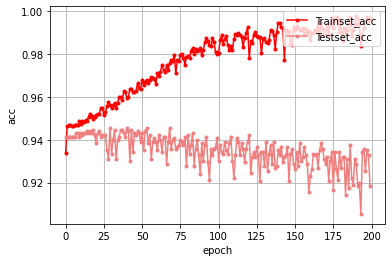

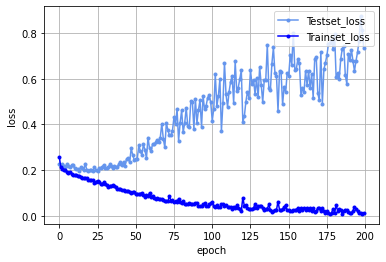

In [39]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

x_len = np.arange(len(loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(x_len, val_loss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


## 성능평가

### 1. Confusion Matrix (Classification Report)

In [40]:
from sklearn.metrics import classification_report

In [41]:
test_pred = model.predict_classes(X_test)

test_pred = [a[0] for a in test_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
model.predict(X_test)

array([[3.5563111e-04],
       [9.3366081e-01],
       [1.5327239e-10],
       ...,
       [5.8948761e-05],
       [1.0078476e-10],
       [5.0303936e-03]], dtype=float32)

In [ ]:
#test_pred

In [43]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1685
         1.0       0.22      0.18      0.20        96

    accuracy                           0.92      1781
   macro avg       0.59      0.57      0.58      1781
weighted avg       0.91      0.92      0.92      1781



### 2. ROC Curve & AUC

In [44]:
import matplotlib as mpl
from sklearn import metrics

0.5710342482690406


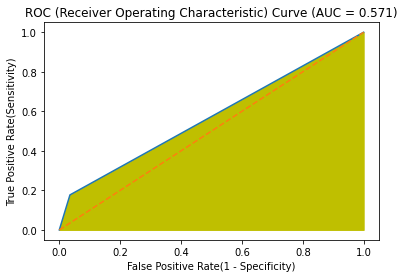

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred) #곡선 그리기

plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color='y')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

score = metrics.auc(fpr, tpr) #면적 구하기
print(score) #1.0

plt.title('ROC (Receiver Operating Characteristic) Curve (AUC = {})'.format(round(score,4)))
plt.show()

![image.png](attachment:image.png)

![image.png](attachment:image.png)